In [52]:
%matplotlib inline
import matplotlib
#matplotlib.use("AGG")
from mpl_toolkits.basemap import Basemap, shiftgrid, interp
import numpy as np
from pylab import *
import numpy.ma as ma
from glob import glob
from scipy.io import netcdf
import numpy.ma as ma
import string
from scipy import stats
import matplotlib as mpl
import scipy.ndimage as ndimage
from netCDF4 import Dataset
#from Read import *
#from Plot import *

In [2]:
##############################################################################################
# Main code 
##############################################################################################

# Temporal range
x = 129
y = 104
nyears = 7

filepath = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/iceh.2013-12-01.nc'
#filepath = '/Users/mct/Documents/WORK/PAPERS/Paper_Growth2017/data/iceh.2013-12-01.nc'
#filepath2 = '/Users/mct/Documents/WORK/PAPERS/Paper_Growth2017/data/april_anom_cs2.nc'
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/april_cs2_anom_bigmask.nc'


# Read tarea, TLON and TLAT
data=Dataset(filepath,"r")
#data=netcdf.netcdf_file(filepath,'r')
TLON=data.variables['TLON'][:, :]
TLAT=data.variables['TLAT'][:, :]
tarea=data.variables['tarea'][:, :]

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


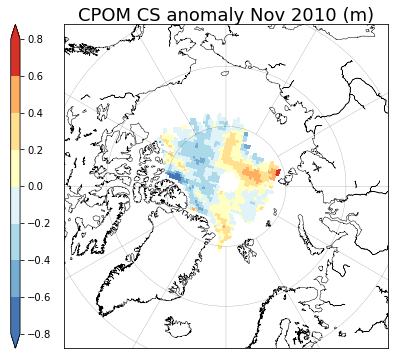

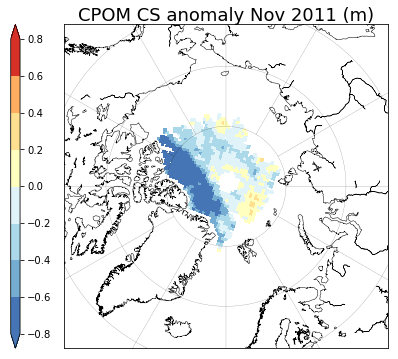

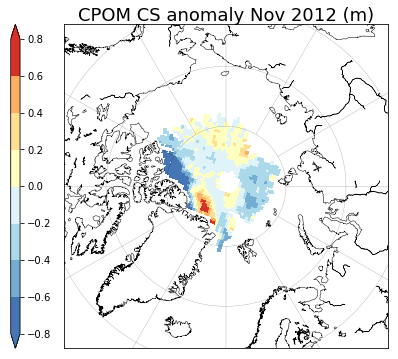

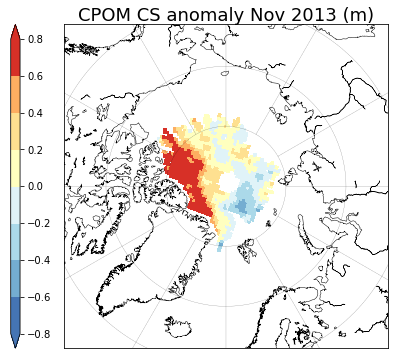

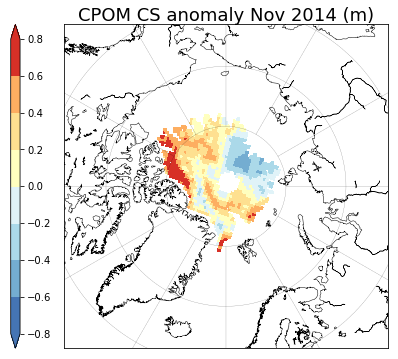

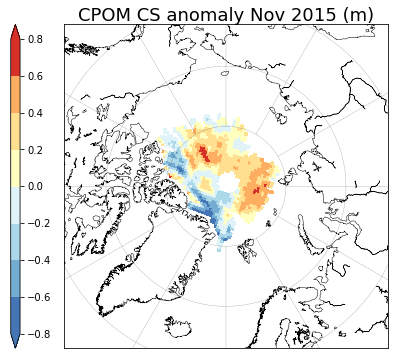

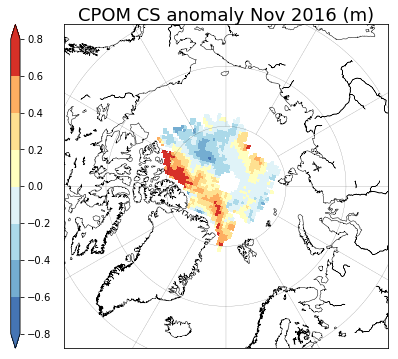

In [8]:
#CPOM CryoSat-2 November
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/David_20170619/Figures/fig_s2_nov_6y_anom.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['var13'][:,:]
CSanom_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
clevs = [-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8]
for y in range(0,7):
        plot_12months_clim_color(TLON, TLAT, CSanom_masked[y], clevs, 'CPOM_nov_CS_anom_big', y-1, 'CS anomaly April')

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


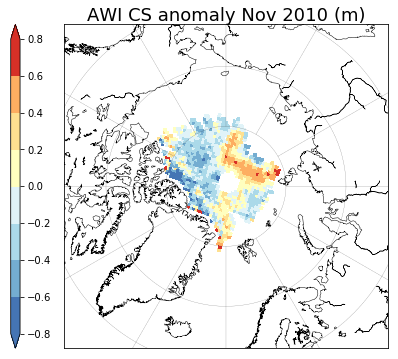

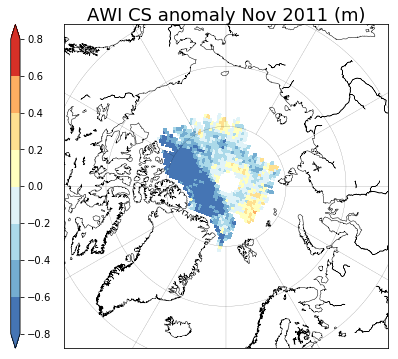

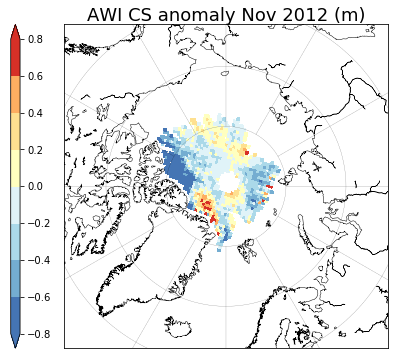

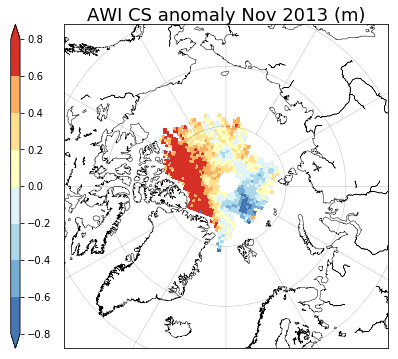

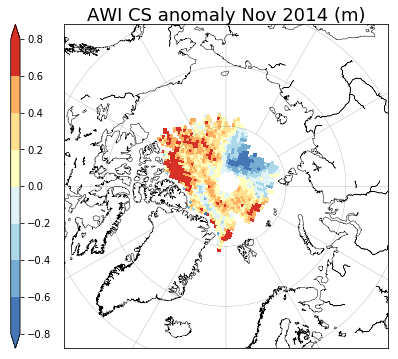

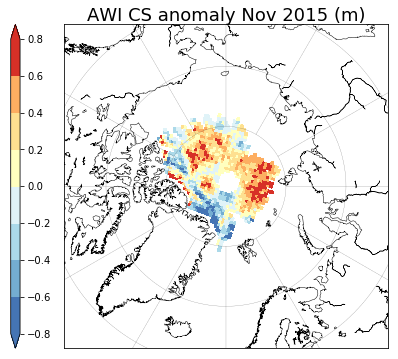

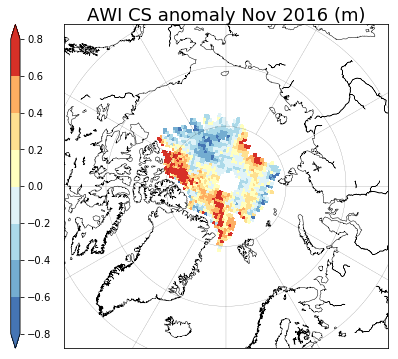

In [10]:
#AWI CryoSat-2 November
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/David_20170619/Figures/awi_nov_anom_7y.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['var1'][:,:]
CSanom_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
clevs = [-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8]
for y in range(0,7):
        plot_12months_clim_color(TLON, TLAT, CSanom_masked[y], clevs, 'CPOM_nov_CS_anom_big', y-1, 'CS anomaly April')

/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/RDEFT4_20101130.nc
/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/RDEFT4_20111130.nc
/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/RDEFT4_20121130.nc
/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/RDEFT4_20131130.nc
/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/RDEFT4_20141130.nc
/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/RDEFT4_20151130.nc
/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/RDEFT4_20161130.nc


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


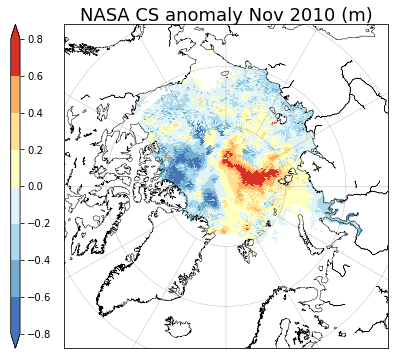

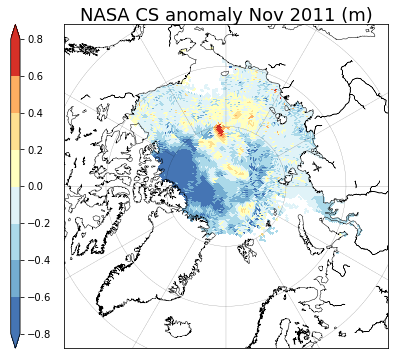

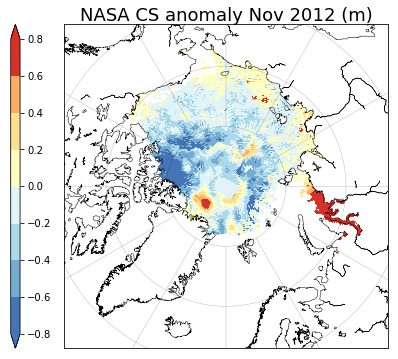

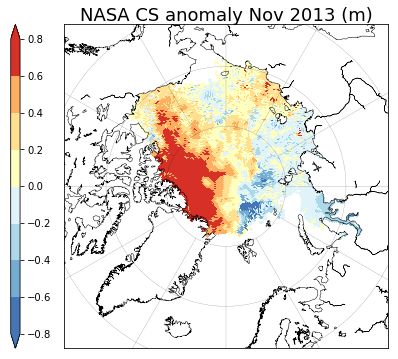

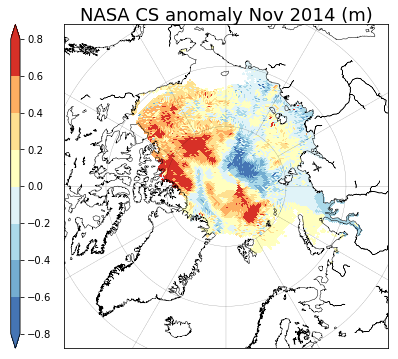

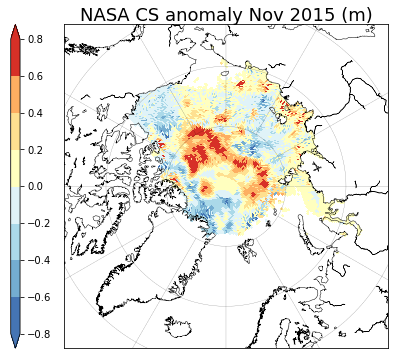

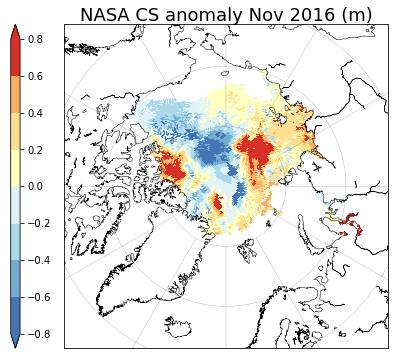

In [73]:
#NASA Kurtz CryoSat-2 November
#CSanom_masked_list=[]
CS_masked = ma.masked_all((7,448,304),float)
for y in range(0,7):
    y1 ='%02d' %(2010+y)
    filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/RDEFT4_'+y1+'1130.nc'
    print(filepath2)
    data2=Dataset(filepath2,"r")
    CS=data2.variables['sea_ice_thickness'][:,:]
    TLON=data2.variables['lon'][:,:]
    TLAT=data2.variables['lat'][:,:]
    CS_masked[y]=ma.masked_where(CS<0, CS)

CSmean_masked=np.mean(CS_masked,0)

for y in range(0,7):
    plot_12months_clim_color(TLON, TLAT, CS_masked[y]-CSmean_masked, clevs, 'NASA_nov_CS_anom_big', y, 'CS anomaly April')

(129, 104)

In [75]:
"""
# mpl_toolkits.basemap.interp(datain, xin, yin, xout, yout, checkbounds=False, masked=False, order=1)
TLON_in=data2.variables['lon'][:,:]
TLAT_in=data2.variables['lat'][:,:]
TLON_in.shape

# Read tarea, TLON and TLAT
data=Dataset(filepath,"r")
#data=netcdf.netcdf_file(filepath,'r')
TLON=data.variables['TLON'][:, :]
TLAT=data.variables['TLAT'][:, :]
TLON.shape

from mpl_toolkits.basemap import interp
m = Basemap(projection='npaeqd',boundinglat=63,lon_0=360,resolution='l')
x_in,y_in=m(TLON_in,TLAT_in)
x_out,y_out=m(TLON,TLAT)
test=interp((CS_masked[0]-CSmean_masked).flatten,x_in,y_in,x_out,y_out,order=1)"""

'\n# mpl_toolkits.basemap.interp(datain, xin, yin, xout, yout, checkbounds=False, masked=False, order=1)\nTLON_in=data2.variables[\'lon\'][:,:]\nTLAT_in=data2.variables[\'lat\'][:,:]\nTLON_in.shape\n\n# Read tarea, TLON and TLAT\ndata=Dataset(filepath,"r")\n#data=netcdf.netcdf_file(filepath,\'r\')\nTLON=data.variables[\'TLON\'][:, :]\nTLAT=data.variables[\'TLAT\'][:, :]\nTLON.shape\n\nfrom mpl_toolkits.basemap import interp\nm = Basemap(projection=\'npaeqd\',boundinglat=63,lon_0=360,resolution=\'l\')\nx_in,y_in=m(TLON_in,TLAT_in)\nx_out,y_out=m(TLON,TLAT)\ntest=interp((CS_masked[0]-CSmean_masked).flatten,x_in,y_in,x_out,y_out,order=1)'

In [72]:
##############################################################################################
# Function to print pdf clim
##############################################################################################

def plot_12months_clim_color(TLON, TLAT, var3D, clevs, variable_in, y, title):

        #CHOOSE MAP PROJECTION
        m = Basemap(projection='npaeqd',boundinglat=63,lon_0=360,resolution='l')
        y1 ='%02d' %(2010+y)
#        y1 ='%02d' %(1990+y)

#READ IN LON/LAT AND THEN FIND THE XY COORDINATES IN THE GIVEN BASEMAP PROJECTION ABOVE.
        lons = TLON # var2D[1]
        lats = TLAT # var2D[2]
        xpts,ypts = m(lons,lats)

        fig = figure(figsize=(6.5,5))
        clf()
#        title=['CICE anomaly April '+y1]
#        title=['free CICE anomaly April '+y1]
#        title=['CS anomaly April '+y1]
#        title=['dh AWI - CPOM '+y1]
#        title=['CICE anomaly dh dyn '+y1]
#        title=['CICE anomaly dh therm '+y1]    
#        title=['Anom FDD 1 Oct -> 15 Apr '+y1]
#        title=['CPOM CS anomaly Nov '+y1+' (m)']
#        title=['AWI CS anomaly Nov '+y1+' (m)']
        title=['NASA CS anomaly Nov '+y1+' (m)']
        subplots_adjust(left=0.05, right=0.95, wspace=0.03, hspace=0.08, bottom=0.05, top=0.95)

        ax1 = subplot(1,1,1)
        text(0.5, 1.01, '%s' %title[0],
        horizontalalignment='center',
        fontsize=18,
        transform = ax1.transAxes)

#        cmap = mpl.colors.ListedColormap(['#4575b4','#74add1','#abd9e9','#f8f8ff','#f8f8ff','#fee090','#fdae61','#f46d43','#d73027'])
        cmap = mpl.colors.ListedColormap(['#4575b4','#74add1','#abd9e9','#e0f3f8','#ffffbf','#fee090','#fdae61','#f46d43','#d73027'])
        #cmap = mpl.colors.ListedColormap(['#081D58','#253494','#225EA8','#1D91C0','#41B6C4','#7FCDBB','#C7E9B4','#EDF8B1','#FFFFD9'])
        bounds = clevs
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        im1 = m.pcolormesh(xpts, ypts, var3D, cmap=cmap, norm = norm)#, origin='lower')

#        clevs2 = [20]
#        im2 = m.contour(xpts, ypts, var3D,clevs2,colors='orange')#, cmap=cmap2, norm = norm2)
#        clabel(im2, inline=1, fontsize=5)

        m.drawparallels(np.arange(60,90,10), linewidth = 0.25, linestyle='solid', zorder=8)
        m.drawmeridians(np.arange(0.,360.,30.), linewidth = 0.25, zorder=8)
        m.drawcoastlines(linewidth=0.5)

        cax1 = fig.add_axes([0.04, 0.05, 0.02, 0.9])
        cbar1 = colorbar(im1,cax=cax1,orientation='vertical', extend='both')
        cbar1.set_ticks(clevs)

        savepath = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/GRL_Winter_growth_2017/Figs/'
        #savepath = '/Users/mct/Documents/WORK/PAPERS/Paper_Growth2017/Python/Figs/'
        savefig(savepath + variable_in + '_' + y1 + '.png', format='png', dpi=300)
        #savefig(savepath + variable_in + '/' + variable_in + '_' + rundir_name_in + '_' + month1 + '.pdf')